In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [3]:
df = pd.read_csv('../../data/testing/nomis/car_van.csv', index_col=0)

In [4]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [5]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [6]:
df = pd.DataFrame(dct, index=df.index)

In [7]:
df.to_csv('../../data/testing_del/nomis/car_van.csv')

# Compute values for synthetic data

In [8]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', '0', '1', '2', '3', '4+', '#vehicles']

In [9]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [10]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/ciDATGAN/car_van.csv')

In [11]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [12]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/DATGAN/car_van.csv')

In [13]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(0, 4):
        vals.append(np.sum(1/df[df['hh_carvan'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_carvan'] >= 4]['hh_people']))

    vals.append(np.sum(df['hh_carvan']/df['hh_people']))

    dct[b] = vals

In [14]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/oversample/car_van.csv')

# Compare

In [21]:
orig = pd.read_csv('../../data/testing_del/nomis/car_van.csv', index_col=0)

In [22]:
files = [
    '../../data/testing_del/DATGAN/car_van.csv',
    '../../data/testing_del/ciDATGAN/car_van.csv',
    '../../data/testing_del/oversample/car_van.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [23]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [24]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.29e-01 \pm 8.33e-02
ciDATGAN: 1.02e-01 \pm 3.82e-02
Oversample LTDS: 1.03e-01 \pm 4.01e-02


<AxesSubplot:>

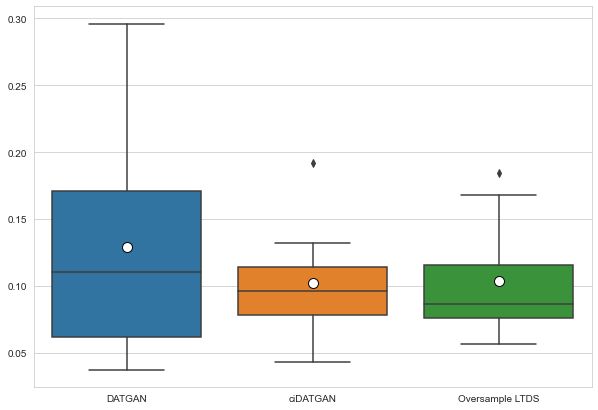

In [25]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [26]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.296091,0.132226,0.117427
1,0.249445,0.192106,0.184319
2,0.037503,0.042897,0.056820
3,0.067533,0.089888,0.091718
4,0.111297,0.075946,0.109790
5,0.059711,0.115746,0.167611
6,0.109647,0.086051,0.071594
7,0.054310,0.074648,0.077780
8,0.117987,0.103054,0.081802
9,0.188613,0.109807,0.075703
